In [1]:
import numpy as np

import pandas as pd

from pandas import Series, DataFrame

from numpy.random import randn

from pandas_datareader import data as pdr

from scipy import stats

import seaborn as sns

sns.set_style('whitegrid')

import matplotlib as mpl

import matplotlib.pyplot as plt

import datetime as dt

from __future__ import division

%matplotlib inline

In [17]:
tech_stock =['AAPL','GOOG','MSFT','AMZN']

In [20]:
end = dt.datetime.now()

start = dt.datetime(end.year - 1,end.month,end.day)

In [21]:
for stock in tech_stock:
    globals()[stock] = pdr.get_data_yahoo(stock,start,end)

In [24]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,158.354900,154.579641,156.378088,156.563705,8.829323e+07,156.218256
std,12.652199,12.359901,12.579536,12.501656,2.665370e+07,12.474009
min,132.389999,129.039993,130.070007,130.059998,4.100000e+07,130.059998
25%,148.275002,145.544998,146.750000,146.934998,6.946830e+07,146.327126
50%,155.570007,152.160004,153.759995,154.070007,8.328130e+07,153.424301
75%,169.774994,165.525002,167.735001,166.894997,1.011393e+08,166.650146
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.511703


In [26]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-08-02 to 2022-07-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       251 non-null    float64
 1   Low        251 non-null    float64
 2   Open       251 non-null    float64
 3   Close      251 non-null    float64
 4   Volume     251 non-null    float64
 5   Adj Close  251 non-null    float64
dtypes: float64(6)
memory usage: 13.7 KB


<AxesSubplot:xlabel='Date'>

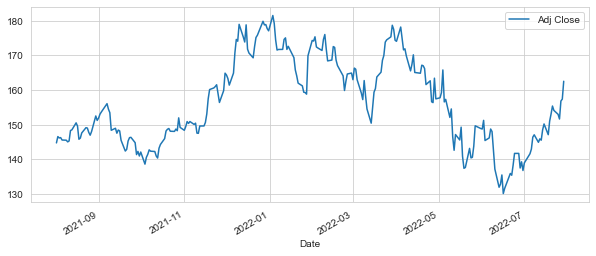

In [27]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

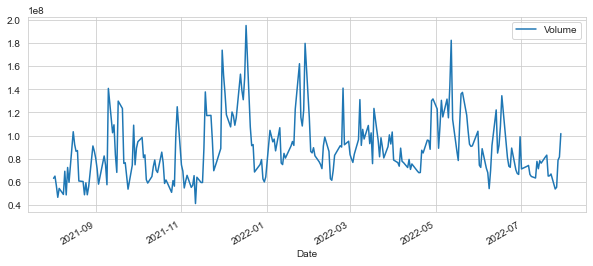

In [28]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [32]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = DataFrame.rolling(AAPL['Adj Close'],ma).mean()

<AxesSubplot:xlabel='Date'>

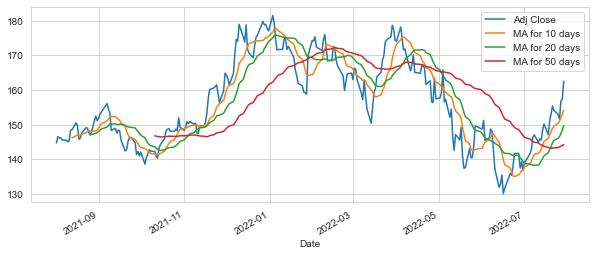

In [41]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots = False, figsize = (10,4))

<AxesSubplot:xlabel='Date'>

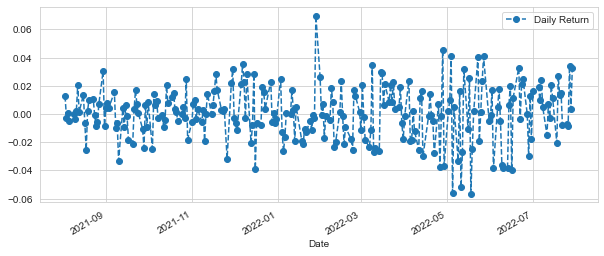

In [49]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

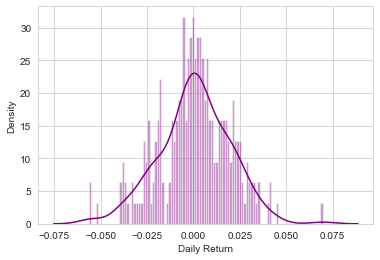

In [51]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

<AxesSubplot:>

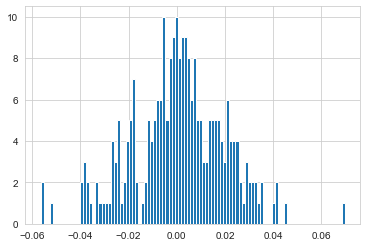

In [52]:
AAPL['Daily Return'].hist(bins=100)

In [55]:
closing_df = pdr.get_data_yahoo(tech_list,start,end)['Adj Close']

In [56]:
closing_df

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-08-02,144.693329,135.989502,282.513123,166.574005
2021-08-03,146.522888,136.279999,284.794525,168.311996
2021-08-04,146.115219,136.028503,284.189453,167.735992
2021-08-05,146.224564,136.940002,287.175018,168.799500
2021-08-06,145.527527,137.035995,287.115540,167.246994
...,...,...,...,...
2022-07-25,152.949997,108.209999,258.829987,121.139999
2022-07-26,151.600006,105.440002,251.899994,114.809998
2022-07-27,156.789993,113.599998,268.739990,120.970001


In [57]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-08-02,144.693329,135.989502,282.513123,166.574005
2021-08-03,146.522888,136.279999,284.794525,168.311996
2021-08-04,146.115219,136.028503,284.189453,167.735992
2021-08-05,146.224564,136.940002,287.175018,168.799500
2021-08-06,145.527527,137.035995,287.115540,167.246994


In [58]:
tech_rets = closing_df.pct_change()

In [59]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-08-02,NaN,NaN,NaN,NaN
2021-08-03,0.012644,0.002136,0.008075,0.010434
2021-08-04,-0.002782,-0.001845,-0.002125,-0.003422
2021-08-05,0.000748,0.006701,0.010506,0.006340
2021-08-06,-0.004767,0.000701,-0.000207,-0.009197


/Users/austinreyes/opt/anaconda3/envs/main/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


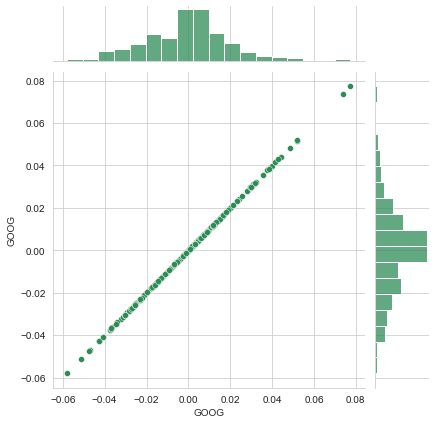

In [63]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter', color = 'seagreen')

/Users/austinreyes/opt/anaconda3/envs/main/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


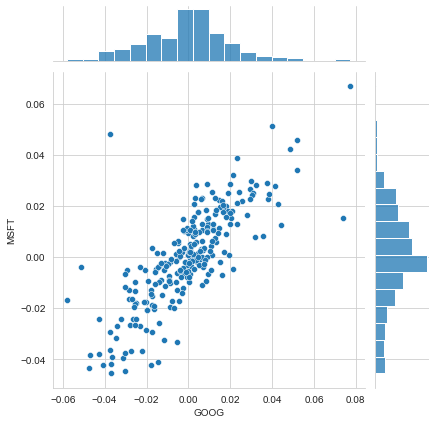

In [61]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

In [134]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-08-02,NaN,NaN,NaN,NaN
2021-08-03,0.012644,0.002136,0.008075,0.010434
2021-08-04,-0.002782,-0.001845,-0.002125,-0.003422
2021-08-05,0.000748,0.006701,0.010506,0.006340
2021-08-06,-0.004767,0.000701,-0.000207,-0.009197


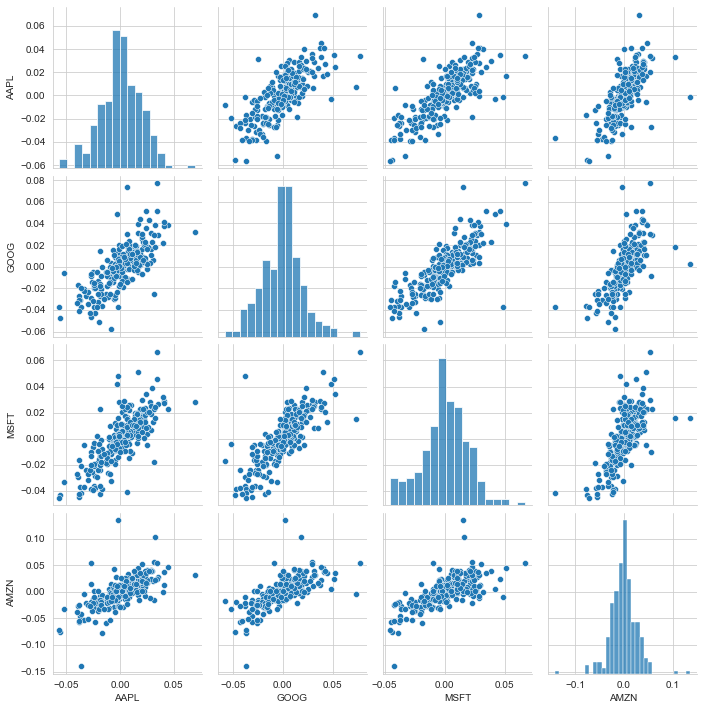

In [68]:
sns.pairplot(tech_rets.dropna())

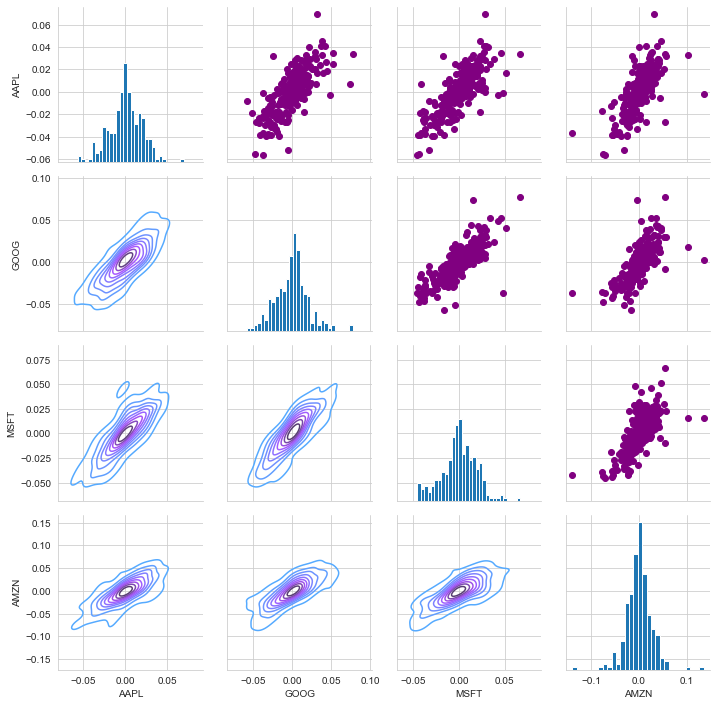

In [135]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter,color='purple')

return_fig.map_lower(sns.kdeplot,cmap='cool_d')

return_fig.map_diag(plt.hist,bins=30)

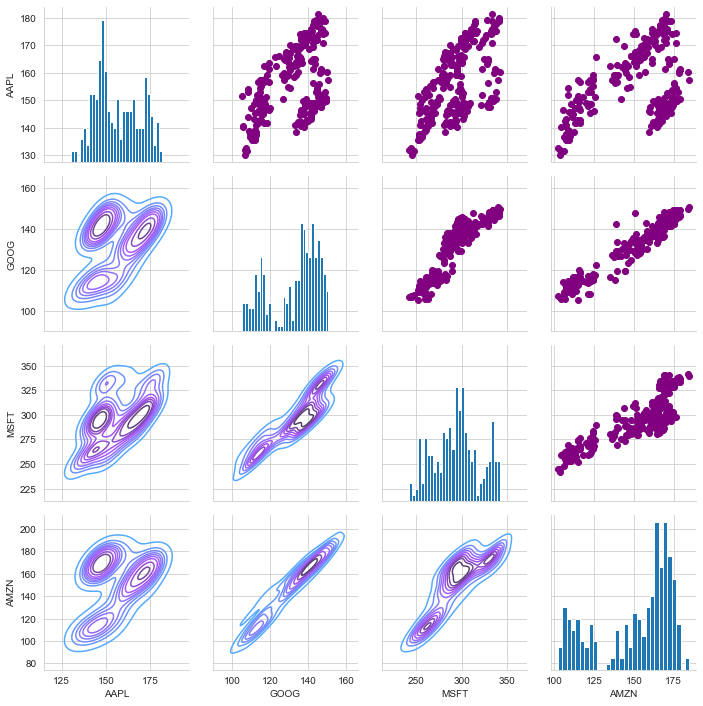

In [77]:
return_fig = sns.PairGrid(closing_df)

return_fig.map_upper(plt.scatter,color='purple')

return_fig.map_lower(sns.kdeplot,cmap='cool_d')

return_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

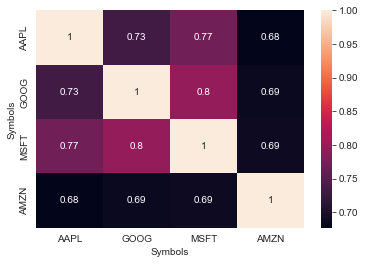

In [113]:
sns.heatmap(DataFrame.corr(tech_rets),annot=True)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

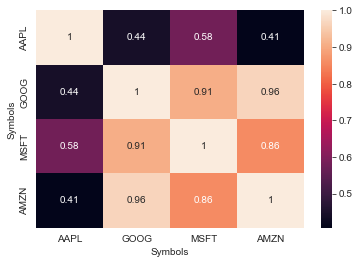

In [136]:
sns.heatmap(DataFrame.corr(closing_df),annot=True)

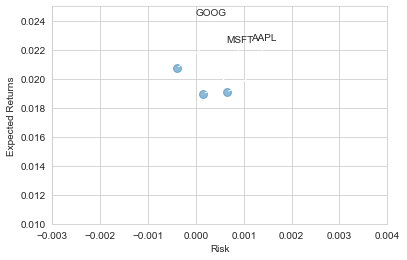

In [110]:
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(),rets.std(),alpha = 0.5, s = area)

plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

plt.ylabel('Expected Returns')
plt.xlabel('Risk')

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy= (x,y) , xytext=(50,50),
        textcoords = 'offset points', ha = 'right', va='bottom',
        arrowprops = dict(arrowstyle = '-' , connectionstyle = 'arc3,rad=-0.3'))

/Users/austinreyes/opt/anaconda3/envs/main/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

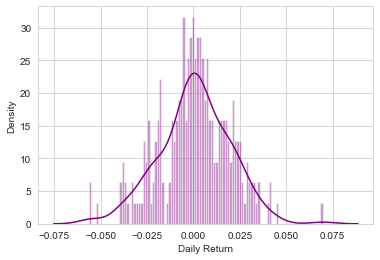

In [102]:
sns.distplot(AAPL['Daily Return'],bins=100,color='purple')

In [105]:
rets['AAPL'].quantile(0.05)

-0.03246132816778988

In [115]:
days = 365

dt = 1/365

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [119]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu * dtt, scale = sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price
    

In [243]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-04,136.537994,135.414993,136.249496,136.028503,16528000.0,136.028503
2021-08-05,136.949997,135.600006,136.028503,136.940002,11866000.0,136.940002
2021-08-06,137.080048,136.046494,136.294998,137.035995,13560000.0,137.035995
2021-08-09,138.321503,136.428757,136.949005,138.001999,12374000.0,138.001999
2021-08-10,138.551498,137.226501,138.079498,138.096497,16034000.0,138.096497


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

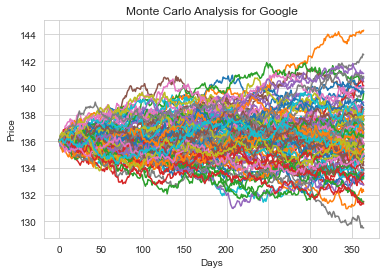

In [244]:
start_price = 136.028503

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [246]:
runs = 10000

simulations = np.zeros(runs)

np.set_printoptions(threshold = 5)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];
    

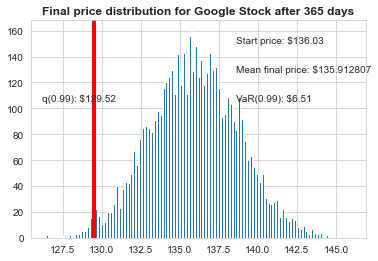

In [247]:
q = np.percentile(simulations, 1)

plt.hist(simulations, bins = 200)

plt.figtext(0.6, 0.8, s = "Start price: $%.2f" %start_price)

plt.figtext(0.6, 0.7, "Mean final price: $%2f" % simulations.mean())

plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

